<a href="https://colab.research.google.com/github/Wikanda-Hongboonmee/DWDM21/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Demo_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential #ทำการ import package ที่จะนำมาใช้ในการสร้างตัวแบบ LSTM

In [2]:
from keras.layers import Dense

In [3]:
from keras.layers import LSTM

In [4]:
from matplotlib import pyplot

In [5]:
import pandas as pd  # pandas เป็น Package ที่ใช้เกี่ยวกับการจัดการข้อมูลที่เป็นตาราง , เรียกใช้โดยการ import แล้วตามด้วยชื่อ Package

In [6]:
from google.colab import drive  # เชื่อมต่อกับ google drive ที่เราเก็บข้อมูลไว้
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os # เป็น package ที่เอาไว้จัดการไฟล์และเอาไว้ดูที่มาของไฟล์หรือ path

In [8]:
path = '/content/drive/My Drive/Demo-project' #ระบุให้ชี้ไปที่โฟลเดอร์ใน google drive ที่เราเซฟไฟล์ไว้ คือ โฟลเดอร์ Demo-project

## **ข้อมูลที่นำมาใช้**

**ข้อมูลชุดที่ 1** : ข้อมูลมูลค่าการส่งออกข้าว ยางพารา และมันสำปะหลังรายเดือนของประเทศไทย ข้อมูลรายเดือน ตั้งแต่เดือน มกราคม 2554 -  มีนาคม 2565

ที่มาของข้อมูล : http://impexp.oae.go.th/service/export.php

องค์กร : สำนักงานเศรษฐกิจการเกษตร กระทรวงเกษตรและสหกรณ์





---


**ข้อมูลชุดที่ 2**: อัตราแลกเปลี่ยนเฉลี่ยของธนาคารพาณิชย์ ข้อมูลรายเดือน ตั้งแต่เดือน มกราคม 2554 - มีนาคม 2565

ที่มาของข้อมูล : https://www.bot.or.th/thai/statistics/financialmarkets/exchangerate/_layouts/application/exchangerate/exchangerate.aspx

องค์กร : ธนาคารแห่งประเทศไทย

---


**ข้อมูลชุดที่ 3** : ข้อมูลดัชนี SET 100 ข้อมูลรายเดือน ตั้งแต่เดือน มกราคม 2554 - มีนาคม 2565

ที่มาของข้อมูล : https://www.set.or.th/th/market/index/set100/overview

องค์กร : Investing.com

## **ชุดข้อมูลที่ 1**

In [9]:
data = pd.read_excel(os.path.join(path,'export1.xlsx')) # ไฟล์ที่เราต้องการ
data  # print data ดูว่ามันหน้าตาเป็นยังไง

,Date,Months,ข้าว,ยางพารา,มันสำปะหลัง
0,2554-01-01 00:00:00,1,15536428007,36513515829,5789775035
1,2554-02-01 00:00:00,2,14717660237,40694496193,7440822287
2,2554-03-01 00:00:00,3,20183614418,47683834428,8758253202
3,2554-04-01 00:00:00,4,15096164762,31135906606,4788642446
4,2554-05-01 00:00:00,5,21296515946,34338915105,7099610188
...,...,...,...,...,...
130,2564-11-01 00:00:00,131,12771322292,17238310426,9641096643
131,2564-12-01 00:00:00,132,12522650304,17844354831,13270649692
132,2565-01-01 00:00:00,133,7431170164,17374340466,11855470749
133,2565-02-01 00:00:00,134,9675354365,16427316475,11906795209



## **ชุดข้อมูลที่ 2**

In [10]:
Exchange_Rate = pd.read_csv(os.path.join(path,'Exchange Rate.csv')) # ไฟล์ที่เราต้องการ
Exchange_Rate # print data ดูว่ามันหน้าตาเป็นยังไง

,Date,Months,Exchange rate
0,1/1/2554,1,30.5839
1,1/2/2554,2,30.7164
2,1/3/2554,3,30.3684
3,1/4/2554,4,30.0541
4,1/5/2554,5,30.2456
...,...,...,...
130,1/11/2564,131,33.0958
131,1/12/2564,132,33.5647
132,1/1/2565,133,33.2395
133,1/2/2565,134,32.6737


## **ชุดข้อมูลที่ 3**

In [11]:
SET100_Index = pd.read_csv(os.path.join(path,'SET 100 Index.csv')) # ไฟล์ที่เราต้องการ
SET100_Index # print data ดูว่ามันหน้าตาเป็นยังไง

,Date,Months,SET100Index
0,1/1/2554,1.0,1506.94
1,1/2/2554,2.0,1605.25
2,1/3/2554,3.0,1682.40
3,1/4/2554,4.0,1642.80
4,1/5/2554,5.0,1587.31
...,...,...,...
134,1/3/2565,135.0,2250.62
135,NaN,NaN,2280.45
136,NaN,NaN,2158.78
137,NaN,NaN,2168.17


## **รวมข้อมูลที่ต้องนำมาใช้ในการสร้างตัวแบบ LSTM เข้าด้วยกัน**

In [12]:
merged_1 = data.merge(Exchange_Rate, how='left', on='Months')
merged_1.head() # print data ดูว่ามันหน้าตาเป็นยังไง

,Date_x,Months,ข้าว,ยางพารา,มันสำปะหลัง,Date_y,Exchange rate
0,2554-01-01 00:00:00,1,15536428007,36513515829,5789775035,1/1/2554,30.5839
1,2554-02-01 00:00:00,2,14717660237,40694496193,7440822287,1/2/2554,30.7164
2,2554-03-01 00:00:00,3,20183614418,47683834428,8758253202,1/3/2554,30.3684
3,2554-04-01 00:00:00,4,15096164762,31135906606,4788642446,1/4/2554,30.0541
4,2554-05-01 00:00:00,5,21296515946,34338915105,7099610188,1/5/2554,30.2456


In [13]:
merged_2 = merged_1.merge(SET100_Index, how='left', on='Months')
merged_2.head() # print data ดูว่ามันหน้าตาเป็นยังไง

,Date_x,Months,ข้าว,ยางพารา,มันสำปะหลัง,Date_y,Exchange rate,Date,SET100Index
0,2554-01-01 00:00:00,1,15536428007,36513515829,5789775035,1/1/2554,30.5839,1/1/2554,1506.94
1,2554-02-01 00:00:00,2,14717660237,40694496193,7440822287,1/2/2554,30.7164,1/2/2554,1605.25
2,2554-03-01 00:00:00,3,20183614418,47683834428,8758253202,1/3/2554,30.3684,1/3/2554,1682.40
3,2554-04-01 00:00:00,4,15096164762,31135906606,4788642446,1/4/2554,30.0541,1/4/2554,1642.80
4,2554-05-01 00:00:00,5,21296515946,34338915105,7099610188,1/5/2554,30.2456,1/5/2554,1587.31


## **แสดง Columns ที่สนใจ**

In [14]:
data_exportrice = merged_2[['Months','ข้าว']]
data_exportrice  # print data ดูว่ามันหน้าตาเป็นยังไง

,Months,ข้าว
0,1,15536428007
1,2,14717660237
2,3,20183614418
3,4,15096164762
4,5,21296515946
...,...,...
130,131,12771322292
131,132,12522650304
132,133,7431170164
133,134,9675354365


## **ตรวจสอบค่า Missing ของตาราง data_export**

In [15]:
data_exportrice.isnull().any() # ดูว่าคอลัมน์ไหนมีค่า missing บ้าง สรุปคือทุกคอลัมน์ไม่มีค่า  missing

Months    False
ข้าว      False
dtype: bool

In [16]:
data_exportrice.isnull().sum() # จะต้องได้ค่าเป็น 0 (คือไม่มีข้อมูลสูญหาย)

Months    0
ข้าว      0
dtype: int64

In [17]:
data_exportrice.shape # ตรวจสอบขนาดของข้อมูลว่ามีกี่แถว กี่คอลัมน์ ได้เป็น (135, 6) ก็คือมี 135 เดือน 6 คอลัมน์ ได้แก่ มูลค่าการส่งออกข้าว, มูลค่าการส่งออกยางพารา, มูลค่าการส่งออกมันสำปะหลัง, อัตราแลกเปลี่ยน และดัชนี SET 100

(135, 2)

In [18]:
from pandas import DataFrame
from pandas import concat

In [19]:
# Function สำหรับ Preproces ข้อมูลอนุกรมเวลา (Time Series) แบบหลายตัวแปร (Multivariate Forecasting)
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list() 
	# input sequence (t-n, ... t-1)  ลำดับการป้อนข้อมูล (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n) ลำดับการคาดการณ์ (t, t + 1, ... t + n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	
    # put it all together รวมทั้งหมดเข้าด้วยกัน
    agg = concat(cols, axis=1)
    agg.columns = names
	# drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

data_drop = data_exportrice.drop('Months',axis=1)
dataset = data_drop
values = dataset.values
values = values.astype('float32')
data_drop.head()

,ข้าว
0,15536428007
1,14717660237
2,20183614418
3,15096164762
4,21296515946


In [20]:
# เนื่องจากข้อมูลมูลค่าการส่งออกข้าว เป็นค่าตัวเลขที่ค่อนข้างสูงถึงหลักล้าน ดังนั้นจึงทำการ Normalize ปรับค่าให้อยู่ระหว่าง 0 ถึง 1
# ด้วยวิธี Min-Max Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_sc = sc.fit_transform(dataset.values)
data_sc[:10]

array([[0.57141541],
       [0.52129607],
       [0.85588421],
       [0.54446552],
       [0.92400839],
       [0.74994089],
       [0.66538398],
       [0.69338758],
       [0.43136446],
       [0.46722753]])

In [51]:
#ใช้ funtion supervised learning ในการ shift ข้อมูล
reframed = series_to_supervised(data_sc , 12, 1)
reframed.head()

,var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
12,0.571415,0.521296,0.855884,0.544466,0.924008,0.749941,0.665384,0.693388,0.431364,0.467228,0.529278,0.356639,0.215473
13,0.521296,0.855884,0.544466,0.924008,0.749941,0.665384,0.693388,0.431364,0.467228,0.529278,0.356639,0.215473,0.388816
14,0.855884,0.544466,0.924008,0.749941,0.665384,0.693388,0.431364,0.467228,0.529278,0.356639,0.215473,0.388816,0.197336
15,0.544466,0.924008,0.749941,0.665384,0.693388,0.431364,0.467228,0.529278,0.356639,0.215473,0.388816,0.197336,0.258748
16,0.924008,0.749941,0.665384,0.693388,0.431364,0.467228,0.529278,0.356639,0.215473,0.388816,0.197336,0.258748,0.571475


In [53]:
# ทำการ Drop ข้อมูลที่ไม่ต้องการทำนาย
reframed.drop(['var1(t)'], axis=1, inplace=True)
reframed.head()

,var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
12,0.571415,0.521296,0.855884,0.544466,0.924008,0.749941,0.665384,0.693388,0.431364,0.467228,0.529278,0.356639
13,0.521296,0.855884,0.544466,0.924008,0.749941,0.665384,0.693388,0.431364,0.467228,0.529278,0.356639,0.215473
14,0.855884,0.544466,0.924008,0.749941,0.665384,0.693388,0.431364,0.467228,0.529278,0.356639,0.215473,0.388816
15,0.544466,0.924008,0.749941,0.665384,0.693388,0.431364,0.467228,0.529278,0.356639,0.215473,0.388816,0.197336
16,0.924008,0.749941,0.665384,0.693388,0.431364,0.467228,0.529278,0.356639,0.215473,0.388816,0.197336,0.258748


## **แบ่งข้อมูลเป็น Train และ Test**

In [23]:
values = data_sc
n_train_percent = 0.80# จำนวน Samples (หรือจำนวนเดือน) ที่ใช้ Train(80%)
n_train = int(values.shape[0]*0.80)

In [24]:
# สร้างฟังก์ชันเพื่อเตรียมข้อมูลให้เป็นเมทริกซ์ (ใช้ step=1)
def convertToMatrix(data, step=1): 
    X,Y = [], []
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [25]:
# นำข้อมูลที่ผ่านการ Normalize แล้ว ไปแบ่งเป็น Train และ Test
train, test = values[0:n_train], values[n_train:]
train.shape, test.shape  # ข้อมูลสำหรับ Train มีทั้งหมด 98 เดือน และข้อมูลสำหรับ Test มีทั้งหมด 25 เดือน 

((108, 1), (27, 1))

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# reshape input to be 3D [samples, timesteps, features]
step = 1
x_train, y_train = convertToMatrix(train, step)
x_test, y_test = convertToMatrix(test, step)
print('Train Test (after conversion):' ,x_train.shape, x_test.shape,y_train.shape, y_test.shape)

Train Test (after conversion): (107, 1, 1) (26, 1, 1) (107, 1) (26, 1)


## **สร้างตัวแบบ ARFIMA**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import levy_stable, norm

In [ ]:
def get_weights(d, length, threshold=1e-5):
    """
    Computes the weights for the fractionally differentiated features up to a given threshold
    requirement for fixed-window fractional differencing.
    """
    w, k, w_curr = [1.], 1, 1
    
    while(k < length):
        w_curr = (-w[-1]/k*(d-k+1))
        
        if(abs(w_curr) <= threshold):    
            break
            
        w.append(w_curr)
        k += 1
        
    #reshape from a single row to a single column so they can be applied to time-series values easier
    w = np.array(w[::-1]).reshape(-1,1)
    
    return w

In [ ]:
def fracdiff_FFD(series, d, threshold = 1e-5):
    """Computes fractionally differentiated series using fixed-width window"""
    weights = get_weights(d, len(series), threshold)
    width = len(weights) - 1
    df = {}
    
    for name in series.columns:
        #forward fill through unavailable prices and create a temporary series to hold values
        curr_series = series[[name]].fillna(method='ffill').dropna()
        df_temp = pd.Series(dtype='float64')
        
        #loop through all values that fall into range to be fractionally differentiated
        for iloc1 in range(width, curr_series.shape[0]):
            #set values for first and last time-series point to be used in current pass of fractional
                #difference
            
            loc0 = curr_series.index[iloc1-width]
            loc1 = curr_series.index[iloc1]
            
            #make sure current value is valid
            if not np.isfinite(curr_series.loc[loc1,name]):
                continue
            
            #dot product of weights with values from first and last indices
            df_temp.at[loc1] = np.dot(weights.T, curr_series.loc[loc0:loc1])[0,0]
            
        df[name] = df_temp.copy(deep=True)
    df = pd.concat(df, axis=1)
            
    return df

In [ ]:
def ma_model(params, n_points, noise_std = 1, noise_alpha = 2):
    """
    Generate discrete series using MA process
    Coefficients used by the MA process:
        x[t] = params[1]*epsi[t-1] + params[2]*epsi[t-2] + ... + epsi[t]
    """
    ma_order = len(params)
    
    if noise_alpha == 2:
        noise = norm.rvs(scale=noise_std, size=(n_points + ma_order))
    else:
        noise = levy_stable.rvs(
            noise_alpha, 0, scale=noise_std, size=(n_points + ma_order)
        )

    if ma_order == 0:
        return noise
    
    ma_coeffs = np.append([1], params)
    ma_series = np.zeros(n_points)
    
    for idx in range(ma_order, n_points + ma_order):
        take_idx = np.arange(idx, idx - ma_order - 1, -1).astype(int)
        ma_series[idx - ma_order] = np.dot(ma_coeffs, noise[take_idx])
        
    return ma_series[ma_order:]

In [ ]:
def arma_model(params, noise):
    """
    Generate discrete series using ARMA process
    Coefficients used by the AR process:
        x[t] = params[1]*x[t-1] + params[2]*x[t-2] + ... + epsi[t]
    """
    ar_order = len(params)
    
    if ar_order == 0:
        return noise
    
    n_points = len(noise)
    arma_series = np.zeros(n_points + ar_order)
    
    for idx in range(ar_order, len(arma_series)):
        take_idx = np.arange(idx - 1, idx - ar_order - 1, -1).astype(int)
        arma_series[idx] = np.dot(params, arma_series[take_idx]) + noise.iloc[idx - ar_order]
    
    return arma_series[ar_order:]

In [ ]:
def arfima_sim(
    ar_params,
    d,
    ma_params,
    n_points,
    noise_std = 1,
    noise_alpha = 2,
    warmup = 0):
    """Generate discrete series using ARFIMA process"""
    ma_list = ma_model(
        ma_params, n_points + warmup, noise_std=noise_std, noise_alpha=noise_alpha
    )
    ma_df = pd.DataFrame(ma_list, columns=["MA Series"])
    frac_ma = fracdiff_FFD(ma_df, d)
    arfima_series = arma_model(ar_params, frac_ma)
    return arfima_series[-n_points:]

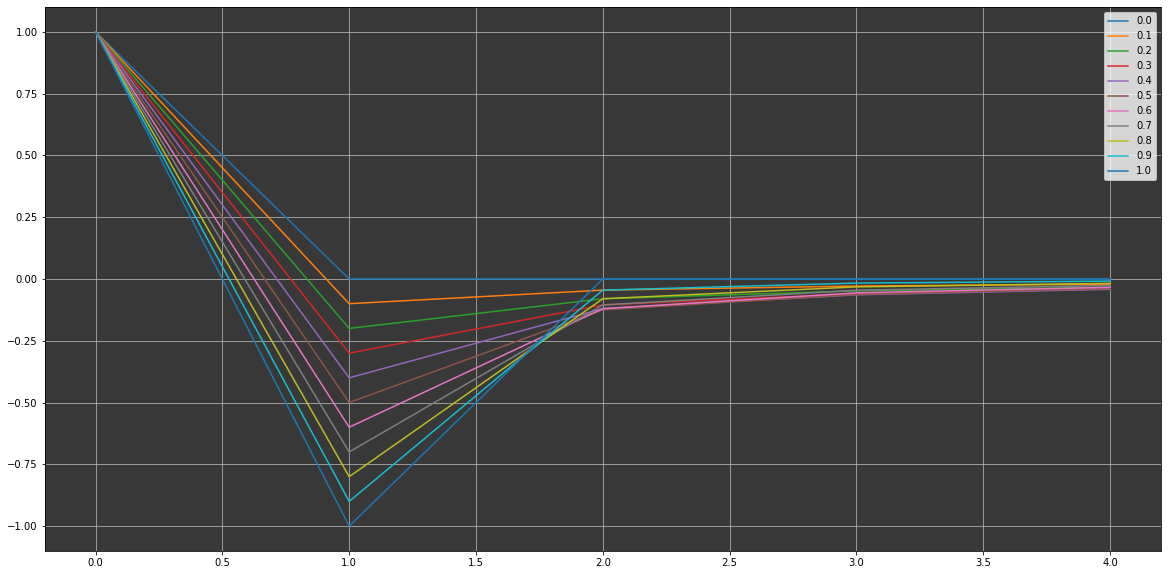

In [ ]:
import matplotlib.pyplot as plt
def plot_weights(dRange, nPlots, length):
    w = pd.DataFrame()
    for d in np.linspace(dRange[0], dRange[1], nPlots):
        w_ = get_weights(d, length)     
        w_ = pd.DataFrame(w_, index=range(w_.shape[0])[::-1],
                          columns=[round(d, 2)])
        w = w.join(w_, how='outer')

    w[np.isnan(w)] = 0
    ax = w.plot(figsize=(20,10))
    ax.legend(loc='upper right');
    ax.set_facecolor('#383838')
    ax.grid(True)

    plt.show()

plot_weights(dRange=[0, 1], nPlots=11, length=5)

In [ ]:
df_result = fracdiff_FFD(data_drop[['ข้าว']], 0.4244, 1e-5)
df_result

,ข้าว
134,0.046045


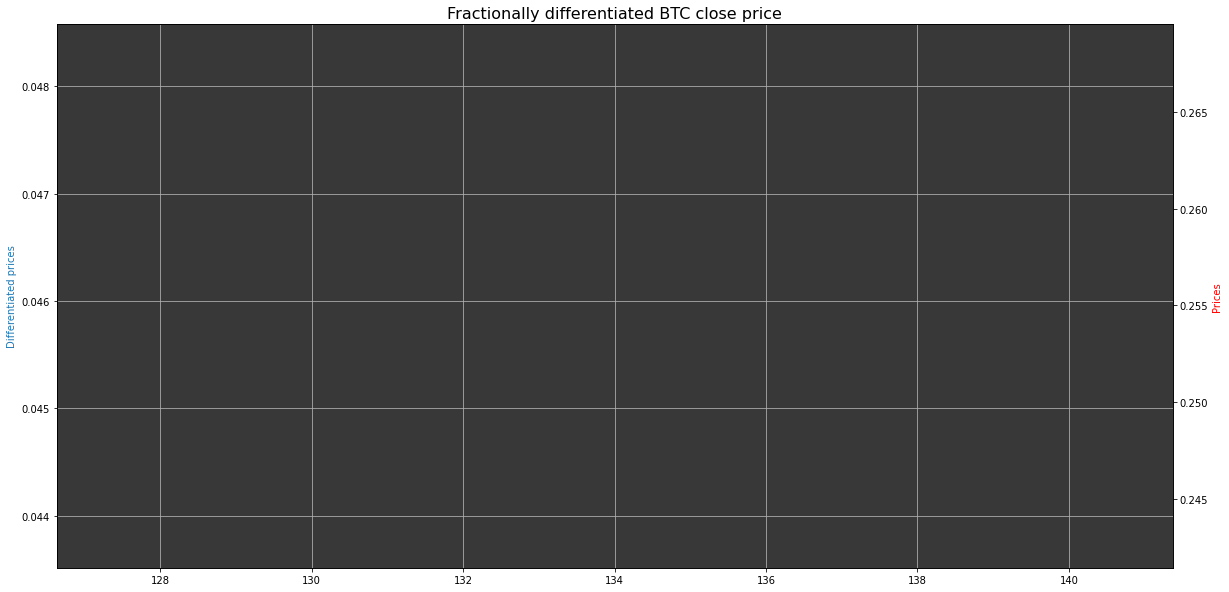

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,10))

color1 = 'tab:blue'
ax1.plot(df_result.index, df_result['ข้าว'], color=color1)
ax1.set_facecolor('#383838')
ax1.set_ylabel('Differentiated prices', color=color1)
ax1.set_title('Fractionally differentiated BTC close price',
          fontsize=16)
ax1.grid(True)

color2 = 'red'
ax2 = ax1.twinx()
ax2.plot(df_result.index,data_drop['ข้าว'].values[-(df_result.shape[0]):], color=color2, label='Prices')
ax2.set_ylabel('Prices', color=color2)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df_result['ข้าว'])
print(f"p-value of BTC: {float(adf[1])}")

ValueError: ignored

## **สร้างตัวแบบ LSTM**

In [28]:
# สร้างตัวแบบ LSTM โดยกำหนดจำนวน Cell (Units) จำนวน 50 
model = Sequential()
model.add(LSTM(50,activation="relu", input_shape=(x_train.shape[1], 
x_train.shape[2])))

In [29]:
# สร้าง hidden layer ตามขนาด output หรือจำนวนวันที่ต้องการ forecast
model.add(Dense(1, activation="tanh"))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [30]:
# fit network
history = model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2,
validation_data = (x_test,y_test), shuffle=False)

Epoch 1/20
107/107 - 1s - loss: 0.1248 - val_loss: 0.0166 - 1s/epoch - 13ms/step
Epoch 2/20
107/107 - 0s - loss: 0.0381 - val_loss: 0.0376 - 260ms/epoch - 2ms/step
Epoch 3/20
107/107 - 0s - loss: 0.0292 - val_loss: 0.0436 - 254ms/epoch - 2ms/step
Epoch 4/20
107/107 - 0s - loss: 0.0290 - val_loss: 0.0439 - 293ms/epoch - 3ms/step
Epoch 5/20
107/107 - 0s - loss: 0.0290 - val_loss: 0.0437 - 267ms/epoch - 2ms/step
Epoch 6/20
107/107 - 0s - loss: 0.0290 - val_loss: 0.0434 - 248ms/epoch - 2ms/step
Epoch 7/20
107/107 - 0s - loss: 0.0290 - val_loss: 0.0431 - 276ms/epoch - 3ms/step
Epoch 8/20
107/107 - 0s - loss: 0.0290 - val_loss: 0.0429 - 253ms/epoch - 2ms/step
Epoch 9/20
107/107 - 0s - loss: 0.0290 - val_loss: 0.0426 - 282ms/epoch - 3ms/step
Epoch 10/20
107/107 - 0s - loss: 0.0289 - val_loss: 0.0423 - 290ms/epoch - 3ms/step
Epoch 11/20
107/107 - 0s - loss: 0.0289 - val_loss: 0.0421 - 292ms/epoch - 3ms/step
Epoch 12/20
107/107 - 0s - loss: 0.0289 - val_loss: 0.0418 - 496ms/epoch - 5ms/step
Epo

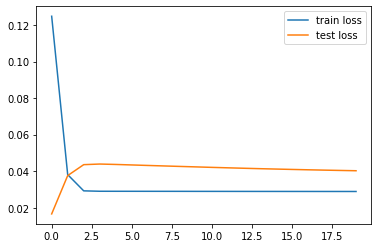

0.028307316824793816


In [31]:
# plot history
pyplot.plot(history.history['loss'], label='train loss')
pyplot.plot(history.history['val_loss'], label='test loss')
pyplot.legend()
pyplot.show()
scores = model.evaluate(x_train, y_train, verbose=0)
print(scores )

In [32]:
trainpredict= model.predict(x_train)

4/4 [==============================] - 0s 3ms/step


In [33]:
# make a prediction ทำการทำนาย
testpredict= model.predict(x_test)

1/1 [==============================] - 0s 25ms/step


In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [35]:
trainpredict

array([[0.49956584],
       [0.48062503],
       [0.59931016],
       [0.4894166 ],
       [0.6217695 ],
       [0.56333596],
       [0.533806  ],
       [0.54367   ],
       [0.4461622 ],
       [0.4599647 ],
       [0.4836583 ],
       [0.4171984 ],
       [0.36200038],
       [0.42970017],
       [0.35488686],
       [0.37896255],
       [0.49958795],
       [0.35782567],
       [0.4307168 ],
       [0.40156507],
       [0.34659576],
       [0.5552597 ],
       [0.46915296],
       [0.37864333],
       [0.42812112],
       [0.35504943],
       [0.39852798],
       [0.34726837],
       [0.3857994 ],
       [0.34470096],
       [0.44884992],
       [0.39561987],
       [0.3669469 ],
       [0.4573842 ],
       [0.38581938],
       [0.4405818 ],
       [0.4253975 ],
       [0.42209694],
       [0.4403139 ],
       [0.40874085],
       [0.45904884],
       [0.44674373],
       [0.47552523],
       [0.48675346],
       [0.4862647 ],
       [0.5754367 ],
       [0.42835355],
       [0.646

In [42]:
#ทำ rescale ข้อมูลกลับ
trainpredict_inv = sc.inverse_transform(trainpredict)
testpredict_inv = sc.inverse_transform(testpredict)
y_train_inv = sc.inverse_transform(y_train)
y_test_inv = sc.inverse_transform(y_test)

train_rmse = np.sqrt(mean_squared_error(y_train_inv, trainpredict_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, testpredict_inv))
print(train_rmse)
print(test_rmse)

2748557499.6752205
3276437701.5645595


In [45]:
prefix = np.empty(step).reshape(-1,1)
prefix.fill(np.nan)
trainpredict_inv = np.concatenate((prefix, trainpredict_inv), axis = 0)
testpredict_inv = np.concatenate((prefix, testpredict_inv), axis = 0)

predict_inv = np.concatenate((trainpredict_inv,testpredict_inv), axis = 0)

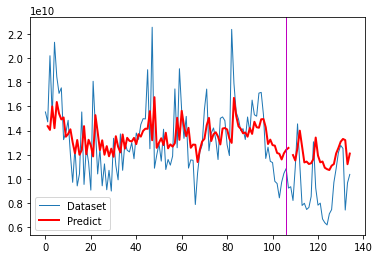

In [56]:
plt.figure()
plt.plot(dataset.values, lw=1.0, label = 'Dataset')
plt.plot(predict_inv,'r',lw = 2.0, label = 'Predict')
plt.axvline(n_train-step-1, c = 'm', lw = 1.0)
plt.legend()
plt.show()